In [14]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

## Window Function

## 사운드 데이터 불러오기 

#### window algorithm

In [15]:
import os
import librosa
import numpy as np
import soundfile as sf

def trim_audio(y, sr):
    sr = 96000
    sec = 2
    # y, sr = librosa.load(audio_file, sr=sr)
    ny = y[:sr*sec]
    # sf.write(save_path, ny, sr)
    return ny 

In [16]:
# class_list = ['airplane', 'bell', 'car_horn', 'cat', 'chirping_birds', 
#               'clapping', 'crying_baby', 'dog_bark', 'drum', 'guitar', 'gun_shot', 
#               'laughing','lion','piano','rain','scream','siren','snoring','thunderstorm',
#               'vacuum_cleaner']

In [64]:
class_list = [96, 80, 81, 99, 97, 82, 83, 98, 84, 85, 86, 93, 87, 88, 89, 90, 91, 92, 94, 95]

In [28]:
path = './movie1_merged.wav'
y, sr = librosa.load(path, sr=22050)
duration = librosa.get_duration(y, sr=sr)
print(duration)

537.0


In [40]:
audio_duration = []
audio = []

sr = 22050
start = 0
end = 0

while end <= 537:
    end = start + 2
    path = './movie1_merged.wav'
    y, sr = librosa.load(path, offset=start, duration=2, sr=sr) 
    ny = trim_audio(y, sr)
    duration = librosa.get_duration(ny, sr=sr)
    audio_duration.append(duration)
    audio.append(ny)
    start += 1

print(len(audio))

537


In [41]:
set_duration = set(audio_duration)
print(set_duration)

{1.0, 2.0}


In [42]:
audio_duration[0]

2.0

In [43]:
for i,j in enumerate(audio):
    if audio_duration[i] != 2.0:
        del audio[i]
        del audio_duration[i]
set_duration = set(audio_duration)
print(set_duration)

{2.0}


In [44]:
len(audio_duration)

536

In [45]:
print(len(audio[0]))

44100


In [46]:
audio_np = np.array(audio, np.float64)
print(audio_np.shape)

(536, 44100)


In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(audio_np)

MinMaxScaler()

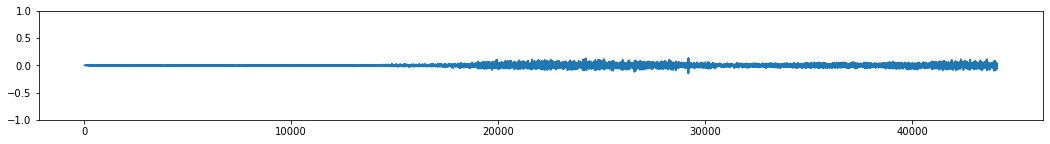

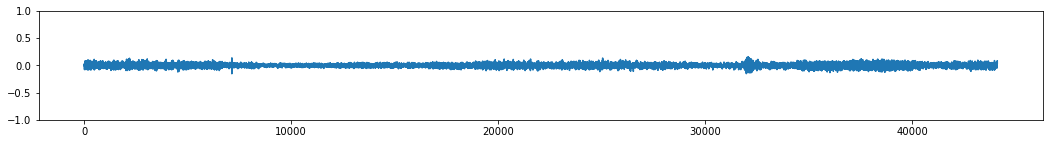

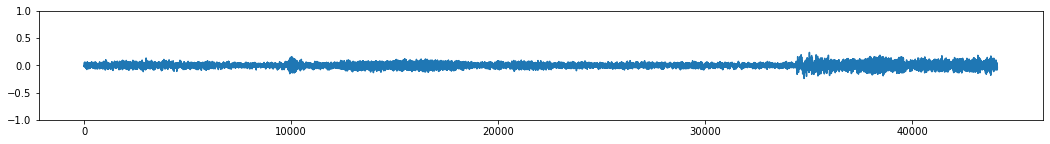

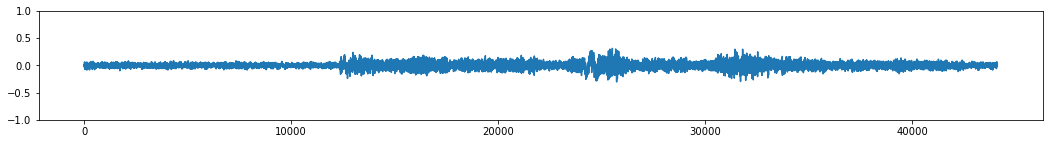

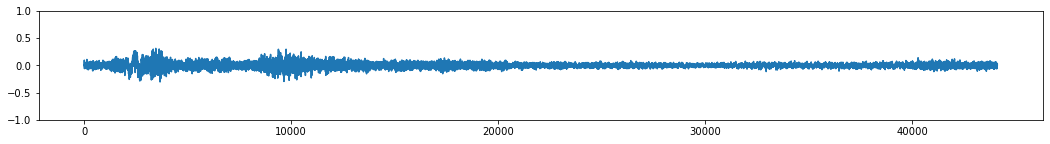

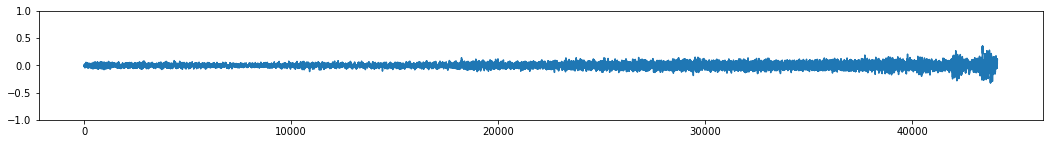

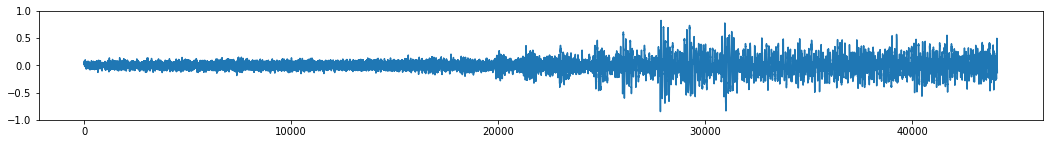

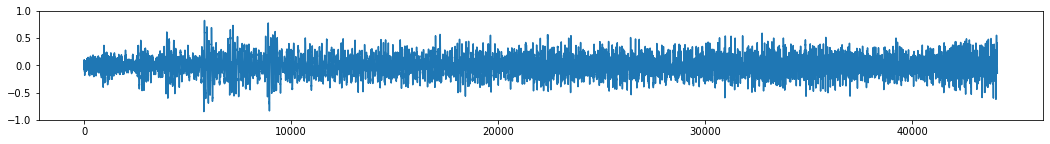

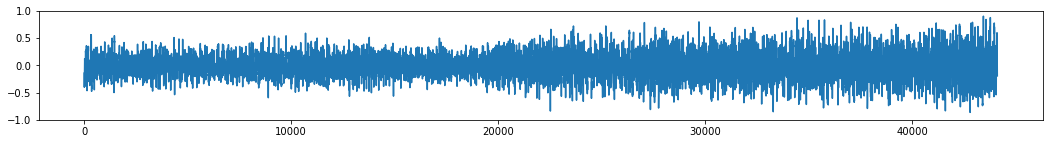

In [48]:
for idx in range(0, len(audio_np[1:10])):
    plt.figure(figsize=(18,2))
    plt.plot(audio_np[idx])
    plt.ylim((-1, 1))
    plt.show()

#### 데이터 전처리 

In [49]:
audio_mfcc = []
for y in audio:
  ret = librosa.feature.mfcc(y=y, sr=sr)
  audio_mfcc.append(ret)

In [50]:
mfcc_np = np.array(audio_mfcc, np.float32)

print(mfcc_np.shape)

(536, 20, 87)


In [52]:
mfcc_np = mfcc_np.reshape((536, 20*87))

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler()
scaler.fit(mfcc_np)

MinMaxScaler()

In [54]:
mfcc_np = mfcc_np.reshape((536, 20, 87))
mfcc_array = np.expand_dims(mfcc_np, -1)
print(mfcc_array.shape)

(536, 20, 87, 1)


## 모델 불러오기 

In [55]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import load_model
import numpy as np
from numpy import argmax

In [56]:
model = load_model('MFCC_CNN_Model.h5')

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-21 23:01:56.257879: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-21 23:01:56.257998: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [57]:
pred = model.predict(mfcc_array)

2022-07-21 23:01:56.932666: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-21 23:01:57.009318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 25ms/step


In [58]:
pred[2]

array([4.9605596e-06, 3.5766038e-04, 2.1247868e-03, 6.0681510e-01,
       5.4700574e-04, 1.2244057e-05, 8.0717151e-04, 3.7240392e-01,
       7.4481541e-06, 8.6073080e-05, 3.6096666e-05, 3.7797960e-03,
       6.2094645e-05, 4.5279934e-04, 2.2366694e-06, 8.2235606e-03,
       1.0755592e-03, 3.1488463e-03, 1.0890359e-05, 4.1764019e-05],
      dtype=float32)

In [59]:
max(pred[2])

0.6068151

In [60]:
type(max(pred[2]))

numpy.float32

In [61]:
print(type(np.argmax(pred[2])))

<class 'numpy.int64'>


## DB 저장

#### 1. 플란다스의 개 

In [67]:
cnt = 0
result = []

for i in pred:
    if max(i) > 0.9:
        tmp = '{} ~ {} {} {}'.format(cnt, (cnt+2), class_list[np.argmax(i)], max(i))
        print(tmp)
        result.append(tmp)
    else:
        tmp = '{} ~ {} {} {}'.format(cnt, (cnt+2), 1000, 0)
        print(tmp)
        result.append(tmp)

    cnt += 1

0 ~ 2 1000 0
1 ~ 3 1000 0
2 ~ 4 1000 0
3 ~ 5 1000 0
4 ~ 6 1000 0
5 ~ 7 1000 0
6 ~ 8 1000 0
7 ~ 9 1000 0
8 ~ 10 1000 0
9 ~ 11 1000 0
10 ~ 12 96 0.9121198058128357
11 ~ 13 86 0.9407564997673035
12 ~ 14 86 0.9769644141197205
13 ~ 15 1000 0
14 ~ 16 94 0.941096305847168
15 ~ 17 94 0.9425579309463501
16 ~ 18 94 0.9678474068641663
17 ~ 19 1000 0
18 ~ 20 98 0.9998551607131958
19 ~ 21 98 0.9561301469802856
20 ~ 22 1000 0
21 ~ 23 98 0.9951404333114624
22 ~ 24 98 0.9951404333114624
23 ~ 25 98 0.9951404333114624
24 ~ 26 98 0.9951404333114624
25 ~ 27 98 0.9951404333114624
26 ~ 28 98 0.9951404333114624
27 ~ 29 98 0.9951404333114624
28 ~ 30 98 0.9970811605453491
29 ~ 31 98 0.9999706745147705
30 ~ 32 98 0.9977505803108215
31 ~ 33 98 0.9999359846115112
32 ~ 34 98 0.9983977675437927
33 ~ 35 98 0.999776303768158
34 ~ 36 98 0.9966657757759094
35 ~ 37 98 0.9999772310256958
36 ~ 38 1000 0
37 ~ 39 98 0.9943740367889404
38 ~ 40 1000 0
39 ~ 41 1000 0
40 ~ 42 1000 0
41 ~ 43 1000 0
42 ~ 44 98 0.938064694404602
4

In [68]:
import pandas as pd

cnt = 0
for i in result:
    tmp1 = str.split(i)
    if cnt == 0:
        movie_sound = pd.DataFrame(
            [[tmp1[0],tmp1[2],tmp1[3],tmp1[4]]],
            index=[cnt],
            columns=['start','end','label','prob']
                            )
    
    else:
        movie_sound2 = pd.DataFrame(
            [[tmp1[0],tmp1[2],tmp1[3],tmp1[4]]],
            index=[cnt],
            columns=['start','end','label','prob']
                            )
        movie_sound = pd.concat([movie_sound,movie_sound2])
        
    cnt += 1

print(movie_sound)

    start  end label                prob
0       0    2  1000                   0
1       1    3  1000                   0
2       2    4  1000                   0
3       3    5  1000                   0
4       4    6  1000                   0
..    ...  ...   ...                 ...
531   531  533    98  0.9999911785125732
532   532  534    98  0.9981556534767151
533   533  535    98  0.9968695044517517
534   534  536    98  0.9747039079666138
535   535  537    98  0.9470660090446472

[536 rows x 4 columns]


In [69]:
check = []

for i in range(len(class_list)):
    check.append([])

for i in range(len(pred)):
    tmp = np.argmax(pred[i])
    check[tmp].append(1)

In [70]:
a = 0
for i in check:
    print(len(i), class_list[a])
    a += 1

7 96
0 80
42 81
14 99
10 97
0 82
0 83
348 98
4 84
0 85
74 86
9 93
3 87
1 88
1 89
0 90
20 91
0 92
3 94
0 95


In [76]:
movie_sound[20:50]

,start,end,label,prob
20,20,22,1000,0
21,21,23,98,0.9951404333114624
22,22,24,98,0.9951404333114624
23,23,25,98,0.9951404333114624
24,24,26,98,0.9951404333114624
25,25,27,98,0.9951404333114624
26,26,28,98,0.9951404333114624
27,27,29,98,0.9951404333114624
28,28,30,98,0.9970811605453491
29,29,31,98,0.9999706745147705


In [75]:
movie_sound[movie_sound['label']=='98']

,start,end,label,prob
18,18,20,98,0.9998551607131958
19,19,21,98,0.9561301469802856
21,21,23,98,0.9951404333114624
22,22,24,98,0.9951404333114624
23,23,25,98,0.9951404333114624
...,...,...,...,...
531,531,533,98,0.9999911785125732
532,532,534,98,0.9981556534767151
533,533,535,98,0.9968695044517517
534,534,536,98,0.9747039079666138


In [78]:
movie_sound.to_csv("movie1_df.csv")